Author: Harshal Bhasgauri

Importing Libraries

In [10]:
import numpy as np
import pandas as pd
import os
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

from sklearn.preprocessing import StandardScaler
%matplotlib inline

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Loading the data


In [11]:
data = pd.read_csv('winequality-red.csv')
data.columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides'
                , 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
data

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Exploratory data analysis and explloring features


In [12]:
data.shape

(1599, 12)

In [13]:
#Check datatypes of each columns
data.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [14]:
data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [17]:
data.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [18]:
#unique/distinct values in quality column
data.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [19]:
#total number of values for each quality rating
data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [20]:
#correlation of every feature with respect to the quality of the wine.
data.corr()['quality']

fixed_acidity           0.124052
volatile_acidity       -0.390558
citric_acid             0.226373
residual_sugar          0.013732
chlorides              -0.128907
free_sulfur_dioxide    -0.050656
total_sulfur_dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

<h3>Heat Map of Correlation Matrix</h3>

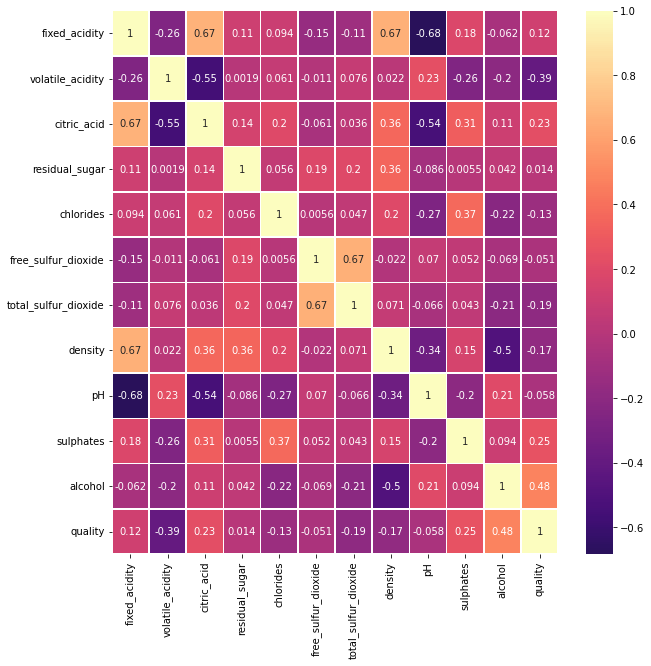

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,center=0,cmap='magma')
plt.show()

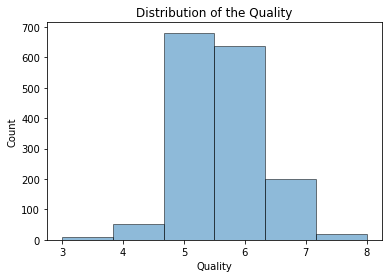

In [27]:
plt.hist(data.quality,bins=6,alpha=0.5,histtype='bar',ec='black')
plt.title('Distribution of the Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

The above plot shows the distribution of the quality of the wine in the dataset, and represents that most of the wine is of average quality i.e. quality ranging from 5 to 7 .

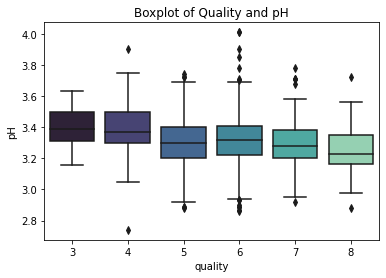

In [28]:
sns.boxplot(x='quality',y='pH',data=data,palette='mako')
plt.title("Boxplot of Quality and pH")
plt.show()

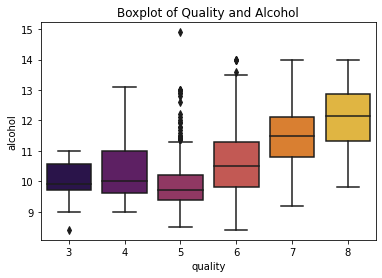

In [29]:
ax = sns.boxplot(x='quality',y='alcohol',data=data,palette='inferno')
plt.title("Boxplot of Quality and Alcohol")
plt.show()

The boxplot above depicts the rise in wine quality as alcohol content increases. The amount of alcohol in the wine directly correlates to its quality. The higher the alcohol content of a wine, the higher its quality. In contrast, it exhibits a modest reduction in pH scale with acceptable quality.

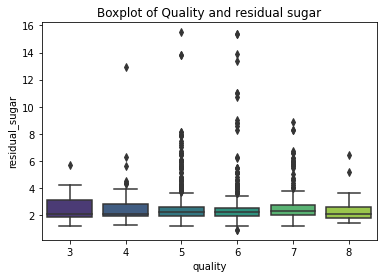

In [30]:
sns.boxplot(x="quality",y="residual_sugar",data=data,palette="viridis")
plt.title("Boxplot of Quality and residual sugar")
plt.show()

Not much effect is noted of sugar residual on quality.

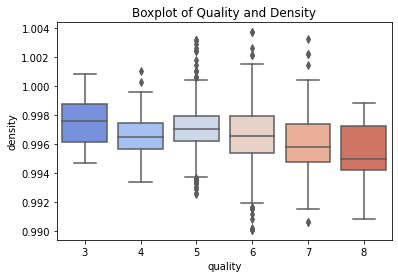

In [31]:
sns.boxplot(x="quality",y="density",data=data,palette="coolwarm")
plt.title("Boxplot of Quality and Density")
plt.show()

The lower the density of the wine, the greater the quality of the wine. We can see from the above boxplot that the quality of wine rises as density decreases.

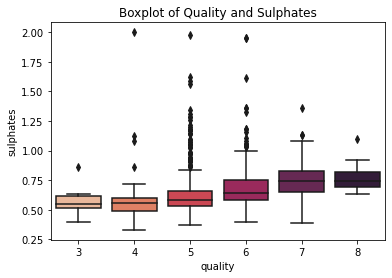

In [32]:
sns.boxplot(x="quality",y="sulphates",data=data,palette="rocket_r")
plt.title("Boxplot of Quality and Sulphates")
plt.show()

The figure above shows that the number of sulphates in the wine enhances the quality of the alcohol.

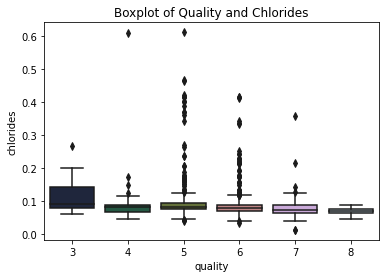

In [33]:
sns.boxplot(x="quality",y="chlorides",data=data,palette="cubehelix")
plt.title("Boxplot of Quality and Chlorides")
plt.show()

Not much effect in the quality of wine for a particular amount of chlorides mixed in them.

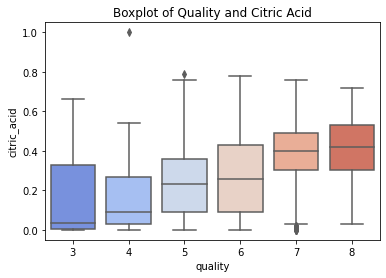

In [34]:
sns.boxplot(x="quality",y="citric_acid",data=data,palette="coolwarm")
plt.title("Boxplot of Quality and Citric Acid")
plt.show()

The quality of the wine increses with increase in the amount of citric acid in the wine.

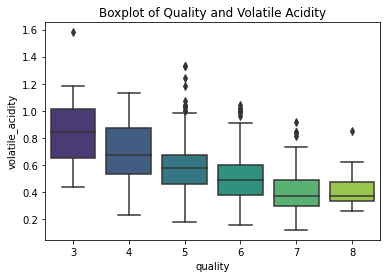

In [35]:
sns.boxplot(x="quality",y="volatile_acidity",data=data,palette="viridis")
plt.title("Boxplot of Quality and Volatile Acidity")
plt.show()

As the number of volatile acids in wine decreases, so does its quality.

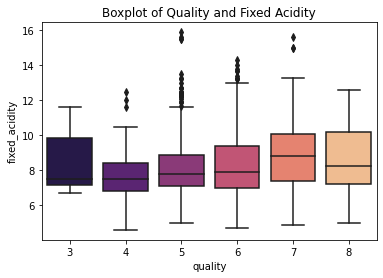

In [36]:
sns.boxplot(x="quality",y="fixed_acidity",data=data,palette="magma")
plt.title("Boxplot of Quality and Fixed Acidity")
plt.show()

There is not much effect of fixed acidity on the quality of the wine/

preprocessing

In [37]:
features = data.drop(['quality'] , axis = 1)
target = data['quality']

trying the random forrest classifier to analyse the feature importance

In [39]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=1, max_depth=12)
data = pd.get_dummies(data)
model.fit(features, data.quality)
display(model.feature_importances_)
feat = data.columns
imp = model.feature_importances_
indices = np.argsort(imp)[:]

array([0.05049791, 0.13604892, 0.04475298, 0.05247952, 0.05881777,
       0.0458654 , 0.07643178, 0.0515247 , 0.05821171, 0.14268737,
       0.28268191])

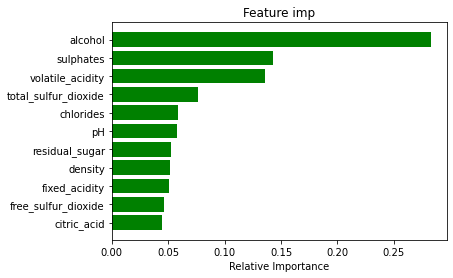

In [40]:
plt.title('Feature imp')
plt.barh(range(len(indices)), imp[indices], color='g', align='center')
plt.yticks(range(len(indices)), [feat[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The most essential factors influencing wine quality are alcohol, sulphates, and volatile acidity, with the least important factors being fixed acidity, fee sulpher dioxide, and citric acid.

In [41]:
del features['fixed_acidity']
del features['free_sulfur_dioxide']
del features['citric_acid']
features

,volatile_acidity,residual_sugar,chlorides,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,0.700,1.9,0.076,34.0,0.99780,3.51,0.56,9.4
1,0.880,2.6,0.098,67.0,0.99680,3.20,0.68,9.8
2,0.760,2.3,0.092,54.0,0.99700,3.26,0.65,9.8
3,0.280,1.9,0.075,60.0,0.99800,3.16,0.58,9.8
4,0.700,1.9,0.076,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...
1594,0.600,2.0,0.090,44.0,0.99490,3.45,0.58,10.5
1595,0.550,2.2,0.062,51.0,0.99512,3.52,0.76,11.2
1596,0.510,2.3,0.076,40.0,0.99574,3.42,0.75,11.0
1597,0.645,2.0,0.075,44.0,0.99547,3.57,0.71,10.2


In [42]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
le = LabelEncoder()
y = le.fit_transform(data.iloc[: , -1])
y = pd.DataFrame(y.reshape(len(y),1))

In [43]:
x_train, x_test, y_train, y_test = train_test_split(features,y, test_size = 0.2, random_state = 0)

In [44]:
y_train_cat = tf.keras.utils.to_categorical(y_train, 6)
y_test_cat = tf.keras.utils.to_categorical(y_test, 6)

## tensorflow dnn

In [45]:
def create_feature_column():
    feat_volatile_acidity = tf.feature_column.numeric_column('volatile_acidity')
    feat_residual_sugar = tf.feature_column.numeric_column('residual_sugar')
    feat_chlorides = tf.feature_column.numeric_column('chlorides')
    feat_total_sulfur_dioxide  = tf.feature_column.numeric_column('total_sulfur_dioxide')
    feat_density              = tf.feature_column.numeric_column('density')
    feat_pH  = tf.feature_column.numeric_column('pH')
    feat_sulphates  = tf.feature_column.numeric_column('sulphates')
    feat_alcohol  = tf.feature_column.numeric_column('alcohol')

    feature_column = [ feat_volatile_acidity,feat_residual_sugar, feat_chlorides, 
                       feat_total_sulfur_dioxide,feat_density,feat_pH,feat_sulphates,feat_alcohol] 

    return feature_column
feature_column = create_feature_column()

In [46]:
def traineval(x_train, y_train, training=False, batch_size=128):
    """An input function for training or evaluating"""
    
    dataset = tf.data.Dataset.from_tensor_slices((dict(x_train), y_train))

    if training:
        dataset = dataset.shuffle(1000).repeat()
    return dataset.batch(batch_size)

In [47]:
my_feature_columns = []
for key in data.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))

In [48]:
dnn = tf.estimator.DNNClassifier(hidden_units = [20,20,20],
                                      feature_columns = feature_column,
                                      n_classes= 6,
                                      activation_fn=tf.nn.relu,
                                      dropout=None)

In [49]:
dnn.train(
    input_fn= lambda: traineval(x_train, y_train , training=True), steps=5000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [50]:
eval_result = dnn.evaluate(input_fn=lambda: traineval(x_test, y_test, training=False))
predictions = dnn.predict(input_fn=lambda: traineval(x_test, y_test, training=False))

In [51]:
print(eval_result)

{'accuracy': 0.490625, 'average_loss': 1.1074674, 'loss': 1.1123697, 'global_step': 5000}


In [52]:
nn = tf.keras.models.Sequential(layers = None , name = None)
nn.add(tf.keras.layers.Input(shape = 8,))
nn.add(tf.keras.layers.Dense(units = 16 , activation = "relu" ))
nn.add(tf.keras.layers.Dense(units = 8 , activation = "relu" ))
nn.add(tf.keras.layers.Dense(units = 6 , activation = "sigmoid"))
nn.summary()
nn.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' ,metrics= ['accuracy'])
history = nn.fit(x_train, y_train_cat,  batch_size= 32, epochs = 150 , validation_data = (x_test,y_test_cat))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
Total params: 334
Trainable params: 334
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
40/40 [==============================] - 1s 10ms/step - loss: 5.3111 - accuracy: 0.1720 - val_loss: 2.3186 - val_accuracy: 0.2375
Epoch 2/150
40/40 [==============================] - 0s 8ms/step - loss: 1.8790 - accuracy: 0.3511 - val_loss: 1.7163 - val_accuracy: 0.4219
Epoch 3/150
40/40 [====================

evaluation of my model

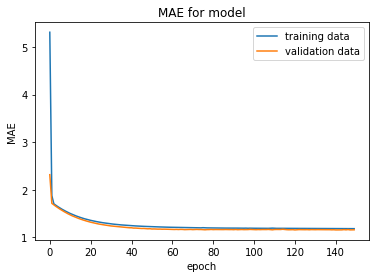

In [53]:
plt.plot(history.history['loss'], label='training data')
plt.plot(history.history['val_loss'], label='validation data')
plt.legend()
plt.title('MAE for model')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.show()

I am plotting the accuracy of the training vs validation accuracy. 

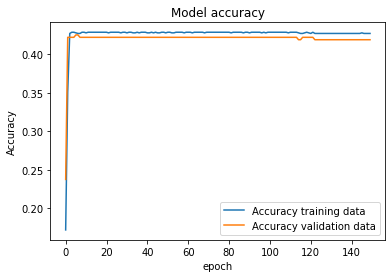

In [54]:
plt.plot(history.history['accuracy'], label='Accuracy training data')
plt.plot(history.history['val_accuracy'], label='Accuracy validation data')
plt.legend()
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()

Conclusion

In the beginning, we could tell that the loss was significant. It does, however, decrease with each cycle. When compared to the validation data, the training data shows higher loss. Furthermore, the model is not effectively trained for a variety of reasons such as a short validation set and biassed data because the model is more resilient and can lead to better testing accuracies. And the figure shows that it provides improved accuracy in Validation testing.